In [2]:
# Import the necceasary packages

# Numerical Operations
import pandas as pd
import numpy as np
import os

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

#Date
import datetime as dt

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

# for better visualization
plt.style.use('ggplot')

## import the data sets

### customers

In [3]:
customer=pd.read_csv(r"F:\PYTHON DATASCIENCE\Credit card case study\Customer Acqusition.csv",index_col=0)
customer

,Customer,Age,City,Product,Limit,Company,Segment
No,,,,,,,
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.2+ KB


In [5]:
customer.isna().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

### spend

In [6]:
spend=pd.read_csv(r"F:\PYTHON DATASCIENCE\Credit card case study\spend.csv",index_col=0)
spend

,Customer,Month,Type,Amount
Sl No:,,,,
1,A1,12-Jan-04,JEWELLERY,485470.80
2,A1,3-Jan-04,PETRO,410556.13
3,A1,15-Jan-04,CLOTHES,23740.46
4,A1,25-Jan-04,FOOD,484342.47
5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...
1496,A67,4-Feb-06,BUS TICKET,356872.73
1497,A68,25-Mar-06,BUS TICKET,204971.10
1498,A69,31-Mar-06,BUS TICKET,50449.44


In [7]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 1500
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Type      1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(1), object(3)
memory usage: 58.6+ KB


In [8]:
spend.Month=pd.to_datetime(spend.Month)

In [9]:
spend.isna().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

### repayment

In [10]:
repayment=pd.read_csv(r"F:\PYTHON DATASCIENCE\Credit card case study\Repayment.csv",index_col=0)
repayment=repayment.drop(repayment.columns[3],axis=1)
repayment=repayment.dropna()
repayment

,Customer,Month,Amount
SL No:,,,
NaN,A1,12-Jan-04,495414.75
2.0,A1,3-Jan-04,245899.02
3.0,A1,15-Jan-04,259490.06
4.0,A1,25-Jan-04,437555.12
5.0,A1,17-Jan-05,165972.88
...,...,...,...
1496.0,A67,9-May-05,55638.77
1497.0,A68,10-May-06,319836.49
1498.0,A69,11-Jul-06,247628.45


In [11]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1500 entries, nan to 1500.0
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 46.9+ KB


In [12]:
repayment.Month=pd.to_datetime(repayment.Month)

In [13]:
repayment.isna().sum()

Customer    0
Month       0
Amount      0
dtype: int64

## 1. In the above dataset,
### a. In case age is less than 18, replace it with mean of age values

In [14]:
(customer.Age<18).sum()

6

In [15]:
age=lambda x:round(customer.Age.mean()) if x<18 else x
customer.Age=customer.Age.apply(age)
customer

,Customer,Age,City,Product,Limit,Company,Segment
No,,,,,,,
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary


In [16]:
(customer.Age <18).sum()

0

## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [17]:
CS=pd.merge(left=customer,right=spend,on='Customer')
CS.Amount=np.where(CS.Amount>CS.Limit,0.5*CS.Limit,CS.Amount)
CS=CS.rename(columns={'Amount':'Spend_Amount'})
CS

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spend_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00


In [18]:
(CS.Spend_Amount>CS.Limit).sum()

0

###  c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [19]:
CR=pd.merge(left=customer,right=repayment,on='Customer')
CR.Amount=np.where(CR.Amount>CR.Limit,CR.Limit,CR.Amount)
CR=CR.rename(columns={'Amount':'Repayment_Amount'})
CR

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repayment_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


In [20]:
(CR.Repayment_Amount>CR.Limit).sum()

0

## 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [21]:
print('Number of distint customers : ',customer.Customer.nunique())

Number of distint customers :  100


### b. How many distinct categories exist?

In [22]:
print('Number of distint categories : ',customer.Product.nunique())
print(customer.Product.drop_duplicates())

Number of distint categories :  3
No
1        Gold
2      Silver
3    Platimum
Name: Product, dtype: object


### c. What is the average monthly spend by customers?

In [23]:
avg_spend=CS.groupby([CS.Month.dt.year,CS.Month.dt.month_name()])[['Spend_Amount']].mean()
avg_spend=avg_spend.rename_axis(['Year','Month']).reset_index()
avg_spend

,Year,Month,Spend_Amount
0,2004,April,124621.976429
1,2004,February,136998.280000
2,2004,January,144233.915179
3,2004,March,133708.090714
4,2004,May,153326.954286
5,2004,November,79642.078571
6,2004,September,171579.263571
7,2005,April,146430.918929
8,2005,August,141707.435357
9,2005,December,84416.000000


### d. What is the average monthly repayment by customers?

In [24]:
avg_repayment=CR.groupby([CR.Month.dt.year,CR.Month.dt.month_name()])[['Repayment_Amount']].mean()
avg_repayment=avg_repayment.rename_axis(['Year','Month']).reset_index()
avg_repayment

,Year,Month,Repayment_Amount
0,2004,April,175632.658000
1,2004,February,125612.505556
2,2004,January,159971.502571
3,2004,March,177767.948000
4,2004,May,151310.396400
5,2004,November,119226.575333
6,2004,September,118926.025625
7,2005,April,121163.452000
8,2005,August,149984.104865
9,2005,December,179119.050833


### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [25]:
e=pd.merge(left=avg_spend,right=avg_repayment,on=['Year','Month'])
e['Monthly Profit']=e.Repayment_Amount-e.Spend_Amount
e['Profit']=np.where(e['Monthly Profit']>0,2.9*(e['Monthly Profit'])/100,0)
e

,Year,Month,Spend_Amount,Repayment_Amount,Monthly Profit,Profit
0,2004,April,124621.976429,175632.658000,51010.681571,1479.309766
1,2004,February,136998.280000,125612.505556,-11385.774444,0.000000
2,2004,January,144233.915179,159971.502571,15737.587392,456.390034
3,2004,March,133708.090714,177767.948000,44059.857286,1277.735861
4,2004,May,153326.954286,151310.396400,-2016.557886,0.000000
5,2004,November,79642.078571,119226.575333,39584.496762,1147.950406
6,2004,September,171579.263571,118926.025625,-52653.237946,0.000000
7,2005,April,146430.918929,121163.452000,-25267.466929,0.000000
8,2005,August,141707.435357,149984.104865,8276.669508,240.023416
9,2005,December,84416.000000,179119.050833,94703.050833,2746.388474


### f. What are the top 5 product types?

In [26]:
CS.groupby('Type')['Spend_Amount'].count().reset_index().sort_values(by='Spend_Amount',ascending=False).head(5).reset_index(drop=True).iloc[:,0]

0           PETRO
1          CAMERA
2            FOOD
3      AIR TICKET
4    TRAIN TICKET
Name: Type, dtype: object

### g. Which city is having maximum spend?

In [27]:
CS.groupby('City')[['Spend_Amount']].sum().sort_values(by='Spend_Amount',ascending=False).head(1).index[0]

'COCHIN'

### h. Which age group is spending more money?

In [28]:
Age_range=[18,30,40,50,60,70,80]
labels=['18-30','31-40','41-50','51-60','61-70','71-80']
CS['Age group']=pd.cut(CS['Age'],bins=Age_range,labels=labels)
CS.groupby('Age group')[['Spend_Amount']].sum().sort_values(by='Spend_Amount',ascending=False).index[0]

'41-50'

### i. Who are the top 10 customers in terms of repayment?

In [29]:
CR.groupby('Customer')[['Repayment_Amount']].sum().sort_values(by='Repayment_Amount',ascending=False).head(10)

,Repayment_Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

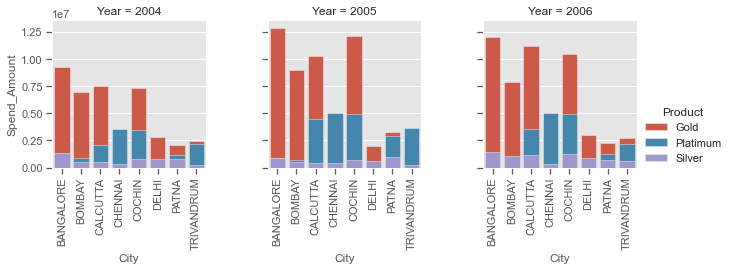

In [30]:

Q3=CS.groupby([CS.Month.dt.year,'City','Product'])[['Spend_Amount']].sum().reset_index().rename(columns={'Month':'Year'})
a=sns.FacetGrid(Q3,col='Year',hue='Product')
b=a.map(sns.barplot,'City','Spend_Amount').add_legend()
for i in b.axes.flat:
    for label in i.get_xticklabels():
        label.set_rotation(90)
plt.show()

## 4. Create graphs for
### a. Monthly comparison of total spends, city wise

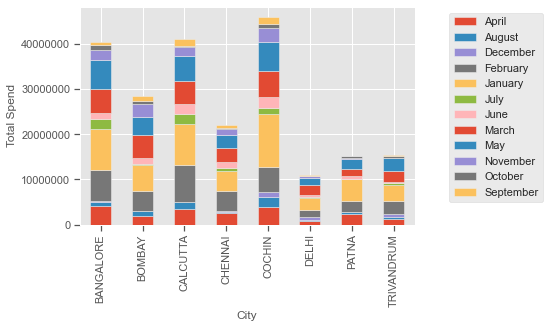

In [31]:
a=CS.groupby(['City',CS.Month.dt.month_name()])[['Spend_Amount']].sum().reset_index()
pd.pivot_table(data=CS,index='City',columns=CS.Month.dt.month_name(),values='Spend_Amount',aggfunc='sum').plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.4,1))
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('City')
plt.ylabel('Total Spend')
plt.show()


###  b .Comparison of yearly spend on air tickets

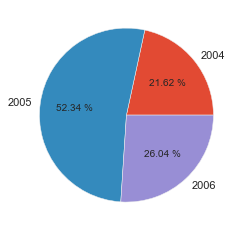

In [32]:
b=CS.query('Type=="AIR TICKET"').groupby(CS.Month.dt.year)[['Spend_Amount']].sum()
plt.pie(b.Spend_Amount,labels=b.index,autopct='%0.2f %%')
plt.show()


### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

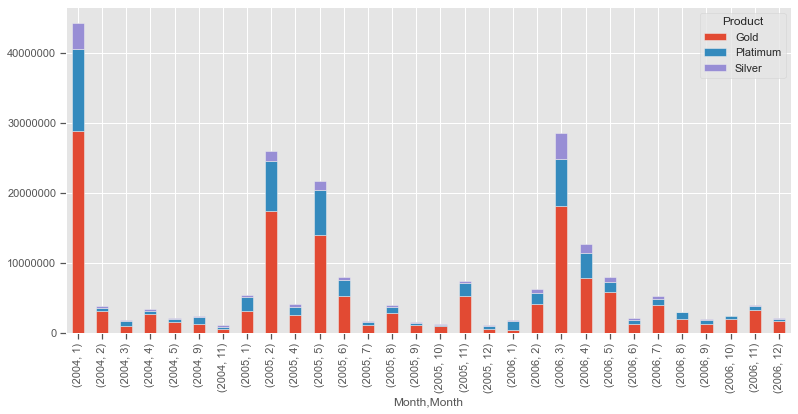

In [33]:
pd.pivot_table(data=CS,index=[CS.Month.dt.year,CS.Month.dt.month],columns='Product',values='Spend_Amount',aggfunc='sum').plot.bar(stacked=True,figsize=(13,6))
plt.ticklabel_format(style='plain',axis='y')
plt.show()

## 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount bydifferent products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers

In [34]:
def top10(product,Timeperiod):
    if  product=='Gold' and Timeperiod=='monthly':
        result=CR.query('Product=="Gold"').groupby(['City',CR.Month.dt.year.rename('Year'),CR.Month.dt.month,'Customer'])[['Repayment_Amount']].sum().sort_values(by=['City','Year','Month','Repayment_Amount'],ascending=[True,True,True,False]).reset_index()
        return result.groupby(['City','Year','Month']).head(10)
    if  product=='Gold' and Timeperiod=='yearly':
        result=CR.query('Product=="Gold"').groupby(['City',CR.Month.dt.year.rename('Year'),'Customer'])[['Repayment_Amount']].sum().sort_values(by=['City','Year','Repayment_Amount'],ascending=[True,True,False]).reset_index()
        return result.groupby(['City','Year','Month']).head(10)
    if  product=='Silver' and Timeperiod=='monthly':
        result=CR.query('Product=="Silver"').groupby(['City',CR.Month.dt.year.rename('Year'),CR.Month.dt.month,'Customer'])[['Repayment_Amount']].sum().sort_values(by=['City','Year','Month','Repayment_Amount'],ascending=[True,True,True,False]).reset_index()
        return result.groupby(['City','Year','Month']).head(10)
    if  product=='Silver' and Timeperiod=='yearly':
        result=CR.query('Product=="Silver"').groupby(['City',CR.Month.dt.year.rename('Year'),'Customer'])[['Repayment_Amount']].sum().sort_values(by=['City','Year','Repayment_Amount'],ascending=[True,True,False]).reset_index()
        return result.groupby(['City','Year','Month']).head(10)
    if  product=='Platinum' and Timeperiod=='monthly':
        result=CR.query('Product=="Platimum"').groupby(['City',CR.Month.dt.year.rename('Year'),CR.Month.dt.month,'Customer'])[['Repayment_Amount']].sum().sort_values(by=['City','Year','Month','Repayment_Amount'],ascending=[True,True,True,False]).reset_index()
        return result.groupby(['City','Year','Month']).head(10)
    if  product=='Platinum' and Timeperiod=='yearly':
        result=CR.query('Product=="Platimum"').groupby(['City',CR.Month.dt.year.rename('Year'),'Customer'])[['Repayment_Amount']].sum().sort_values(by=['City','Year','Repayment_Amount'],ascending=[True,True,False]).reset_index()
        return result.groupby(['City','Year','Month']).head(10)

In [35]:
top10('Gold','monthly')

,City,Year,Month,Customer,Repayment_Amount
0,BANGALORE,2004,1,A1,2241833.41
1,BANGALORE,2004,1,A43,1906497.47
2,BANGALORE,2004,1,A13,1627668.57
3,BANGALORE,2004,1,A14,993114.87
4,BANGALORE,2004,1,A30,379512.30
...,...,...,...,...,...
300,TRIVANDRUM,2006,2,A28,318811.88
301,TRIVANDRUM,2006,3,A28,1547067.86
302,TRIVANDRUM,2006,4,A28,115326.71
303,TRIVANDRUM,2006,5,A28,930071.85
